In [25]:
import uproot

In [26]:
import matplotlib.pyplot as plt
import hist
import mplhep as hep
import awkward as ak

In [55]:
# 20 Gs
# converted_run = uproot.open("/home/etl/Test_Stand/ETROC2_Test_Stand/ScopeHandler/ScopeData/LecroyConverted/converted_run9996.root")
# timing_daq_run = uproot.open("/home/etl/Test_Stand/ETROC2_Test_Stand/ScopeHandler/ScopeData/LecroyTimingDAQ/run_scope9996.root")

# 10 Gs
# converted_run = uproot.open("/home/etl/Test_Stand/ETROC2_Test_Stand/ScopeHandler/ScopeData/LecroyConverted/converted_run9997.root")
# timing_daq_run = uproot.open("/home/etl/Test_Stand/ETROC2_Test_Stand/ScopeHandler/ScopeData/LecroyTimingDAQ/run_scope9997.root")


converted_run = uproot.open("/home/etl/Test_Stand/ETROC2_Test_Stand/ScopeHandler/ScopeData/LecroyConverted/converted_run7400.root")
timing_daq_run = uproot.open("/home/etl/Test_Stand/ETROC2_Test_Stand/ScopeHandler/ScopeData/LecroyTimingDAQ/run_scope7400.root")




[0.00187, 0.00451, 0.00677, 0.00771, ..., -0.00483, 0.00101, 0.00125, -0.00558] -0.02617774 1.1797625


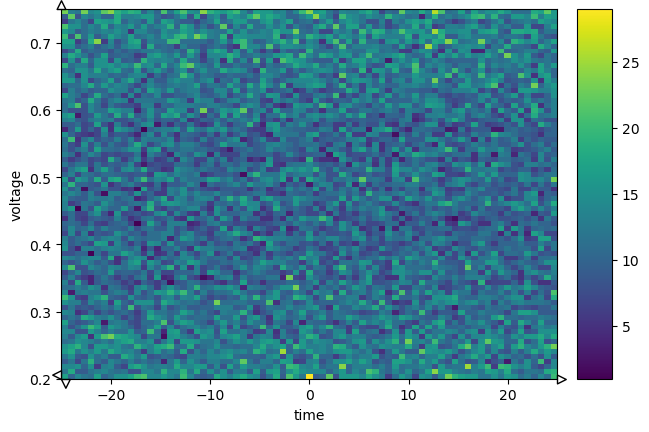

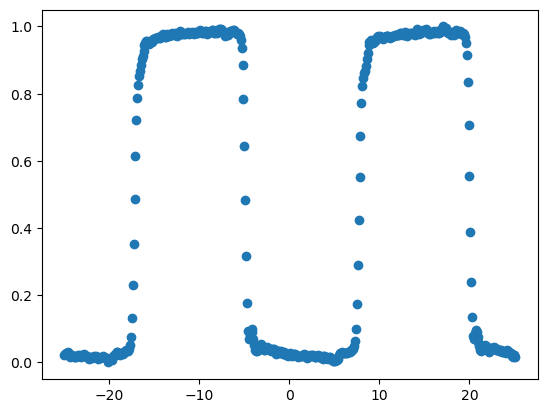

In [57]:
#timing daq run clock 2D hist
tdaq = converted_run['pulse;1'].arrays()
ts = tdaq['time'][:,0]*10**9
vs = tdaq['channel'][:,2]

v_mins = ak.min(vs, axis=1, keepdims=True)
v_maxs = ak.max(vs, axis=1, keepdims=True)
volts_scaled = (vs - v_mins) / (v_maxs-v_mins)

hist_2d = hist.Hist(
    hist.axis.Regular(75,-25,25, name='time'),
    hist.axis.Regular(75, .2, .75, name='voltage'),
).fill(ak.flatten(ts), ak.flatten(volts_scaled))

hep.hist2dplot(hist_2d)

fig, ax = plt.subplots()

i = 0
print(vs[i], min(vs[i]), max(vs[i]))
ax.scatter(ts[i], volts_scaled[i])